<a href="https://colab.research.google.com/github/JacobChoi00/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,744 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and dire

# 오픈소스 기반 데이터 분석 4강 - 데이터 수집


## 2-1 수집한 JSON 형태의 데이터를 pandas DataFrame으로 변환하고, 데이터의 기본 정보를 출력하는 코드와 실행 결과를 첨부하시오. (4점)



In [ ]:
import requests
import pandas as pd
url = "http://openapi.seoul.go.kr:8088/67774b564163686f35376156566b67/json/energyUseDataSummaryInfo/1/100/{year}/{month}"
api_key = "67774b564163686f35376156566b67"

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1,12+1):
      year_months.append(f'{year}{month:02d}')
  return year_months


params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

result = []

for year_month in get_year_months():
  url_year_month = url.format(year=year_month[:4], month=year_month[4:])
  responses = requests.get(url_year_month, params=params)
  row = responses.json()['energyUseDataSummaryInfo']['row']

  data = [{i: d[i] for i in ('YEAR', 'MON', 'MM_TYPE', 'EUS', 'GUS', 'WUS', 'HUS')} for d in row if d.get("MM_TYPE") == "개인"]
  result.extend(data)

df = pd.DataFrame(result)
if responses.status_code == 200:
  print(df)
else:
  print(f"API 호출 실패: {responses.status_code}")



KeyboardInterrupt: 

## 2-2 연도별, 계절별 분석을 위해 날짜 컬럼을 활용하여 연도(year)와 계절(season) 컬럼을 추가하는 전처리 코드를 작성하고, 변환 결과를 확인할 수 있는 출력 결과를 첨부하시오.

In [ ]:
import requests
import pandas as pd
url = "http://openapi.seoul.go.kr:8088/67774b564163686f35376156566b67/json/energyUseDataSummaryInfo/1/100/{year}/{month}"
api_key = "67774b564163686f35376156566b67"

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1,12+1):
      year_months.append(f'{year}{month:02d}')
  return year_months

def dist_season(MON):
      mon_int = int(MON)
      if mon_int in [3, 4, 5]:
        return '봄'
      elif mon_int in [6, 7, 8]:
        return '여름'
      elif mon_int in [9, 10, 11]:
        return '가을'
      else:
        return '겨울'

params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

result = []

for year_month in get_year_months():
  url_year_month = url.format(year=year_month[:4], month=year_month[4:])
  responses = requests.get(url_year_month, params=params)
  row = responses.json()['energyUseDataSummaryInfo']['row']

  data = [{i: d[i] for i in ('YEAR', 'MON', 'MM_TYPE', 'EUS', 'GUS', 'WUS', 'HUS')} for d in row if d.get("MM_TYPE") == "개인"]
  result.extend(data)

df = pd.DataFrame(result)

df['SEASON'] = df['MON'].apply(dist_season)
if responses.status_code == 200:
  print(df)
else:
  print(f"API 호출 실패: {responses.status_code}")



     YEAR MON MM_TYPE        EUS       GUS           WUS           HUS SEASON
0    2015  01      개인  193784708  59133720  12819757.886  22740838.937     겨울
1    2015  02      개인  189974230  56487358  12656888.218  18793320.213     겨울
2    2015  03      개인  175215719  49984873  12655474.249  13826348.508      봄
3    2015  04      개인  183891769  37306841  12954773.246   5836002.885      봄
4    2015  05      개인  177289769  22060892  13086734.214   1320895.801      봄
..    ...  ..     ...        ...       ...           ...           ...    ...
115  2024  08      개인  463971328   7072251    15873544.6    130082.263     여름
116  2024  09      개인  409872908   5729131    15143321.6   3420507.136     가을
117  2024  10      개인  282268119   8233421    15297669.9   2695491.396     가을
118  2024  11      개인  257927956  17418221    14678672.5   8836296.454     가을
119  2024  12      개인  134828126  42103424     7326853.6   1513199.277     겨울

[120 rows x 8 columns]


## 3-1 연도별 에너지 사용 총 사용량(전기+가스+수도+지역난방) 변화량을 선 그래프로 시각화하고, 그래프에 자신의 학번 뒤 4자리를 제목에 포함하여 저장하시오. (예: "연도별 에너지 사용 총액 변화 - 1234") 시각화 코드와 생성된 그래프를 첨부하시오

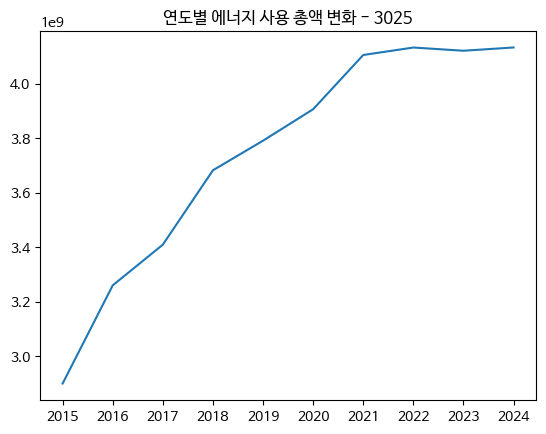

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')
url = "http://openapi.seoul.go.kr:8088/67774b564163686f35376156566b67/json/energyUseDataSummaryInfo/1/100/{year}/{month}"
api_key = "67774b564163686f35376156566b67"

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1,12+1):
      year_months.append(f'{year}{month:02d}')
  return year_months

def dist_season(MON):
      mon_int = int(MON)
      if mon_int in [3, 4, 5]:
        return '봄'
      elif mon_int in [6, 7, 8]:
        return '여름'
      elif mon_int in [9, 10, 11]:
        return '가을'
      else:
        return '겨울'

params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

result = []

for year_month in get_year_months():
  url_year_month = url.format(year=year_month[:4], month=year_month[4:])
  responses = requests.get(url_year_month, params=params)
  row = responses.json()['energyUseDataSummaryInfo']['row']

  data = [{i: d[i] for i in ('YEAR', 'MON', 'MM_TYPE', 'EUS', 'GUS', 'WUS', 'HUS')} for d in row if d.get("MM_TYPE") == "개인"]
  result.extend(data)

df = pd.DataFrame(result)

df['SEASON'] = df['MON'].apply(dist_season)

cols = ['EUS', 'GUS', 'WUS', 'HUS']

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

year_sum = df.groupby('YEAR', as_index=False)[cols].sum()

year_sum['TOTAL'] = year_sum[cols].sum(axis=1)

total_map = year_sum.set_index('YEAR')['TOTAL']
df['TOTAL'] = df['YEAR'].map(total_map)

x = df['YEAR']
y = df['TOTAL']
plt.plot(x, y)
plt.title('연도별 에너지 사용 총액 변화 - 3025')

if responses.status_code == 200:
  plt.savefig('오픈소스3-1')
else:
  print(f"API 호출 실패: {responses.status_code}")



## 3-2 계절별 가스 사용량 평균을 막대 그래프로 시각화하고, 각 막대에 구체적인 수치를 표시하시오. 시각화 코드와 생성된 그래프를 첨부하시오

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')
url = "http://openapi.seoul.go.kr:8088/67774b564163686f35376156566b67/json/energyUseDataSummaryInfo/1/100/{year}/{month}"
api_key = "67774b564163686f35376156566b67"

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1,12+1):
      year_months.append(f'{year}{month:02d}')
  return year_months

def dist_season(MON):
      mon_int = int(MON)
      if mon_int in [3, 4, 5]:
        return '봄'
      elif mon_int in [6, 7, 8]:
        return '여름'
      elif mon_int in [9, 10, 11]:
        return '가을'
      else:
        return '겨울'

params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

result = []

for year_month in get_year_months():
  url_year_month = url.format(year=year_month[:4], month=year_month[4:])
  responses = requests.get(url_year_month, params=params)
  row = responses.json()['energyUseDataSummaryInfo']['row']

  data = [{i: d[i] for i in ('YEAR', 'MON', 'MM_TYPE', 'EUS', 'GUS', 'WUS', 'HUS')} for d in row if d.get("MM_TYPE") == "개인"]
  result.extend(data)

df = pd.DataFrame(result)

df['SEASON'] = df['MON'].apply(dist_season)

cols = ['EUS', 'GUS', 'WUS', 'HUS']

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

year_sum = df.groupby('YEAR', as_index=False)[cols].sum()

year_sum['TOTAL'] = year_sum[cols].sum(axis=1)

total_map = year_sum.set_index('YEAR')['TOTAL']
df['TOTAL'] = df['YEAR'].map(total_map)

x = df['YEAR']
y = df['TOTAL']
plt.plot(x, y)
plt.title('연도별 에너지 사용 총액 변화 - 3025')

if responses.status_code == 200:
  plt.savefig('오픈소스3-1')
else:
  print(f"API 호출 실패: {responses.status_code}")



In [ ]:
import requests
import pandas as pd
url = "http://openapi.seoul.go.kr:8088/67774b564163686f35376156566b67/json/energyUseDataSummaryInfo/1/100/{year}/{month}"
api_key = "67774b564163686f35376156566b67"

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1,12+1):
      year_months.append(f'{year}{month:02d}')
  return year_months

def dist_season(MON):
      mon_int = int(MON)
      if mon_int in [3, 4, 5]:
        return '봄'
      elif mon_int in [6, 7, 8]:
        return '여름'
      elif mon_int in [9, 10, 11]:
        return '가을'
      else:
        return '겨울'

params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

for year_month in get_year_months():
  url_year_month = url.format(year=year_month[:4], month=year_month[4:])
  responses = requests.get(url_year_month, params=params)
  row = responses.json()['energyUseDataSummaryInfo']['row']

  data = [{i: d[i] for i in ('YEAR', 'MON', 'MM_TYPE', 'EUS', 'GUS', 'WUS', 'HUS')} for d in row if d.get("MM_TYPE") == "개인"]

  if responses.status_code == 200:
    print("api 호출 성공")
    print(data)
  else:
    print(f"API 호출 실패: {responses.status_code}")



api 호출 성공
[{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'EUS': '193784708', 'GUS': '59133720', 'WUS': '12819757.886', 'HUS': '22740838.937'}]
api 호출 성공
[{'YEAR': '2015', 'MON': '02', 'MM_TYPE': '개인', 'EUS': '189974230', 'GUS': '56487358', 'WUS': '12656888.218', 'HUS': '18793320.213'}]
api 호출 성공
[{'YEAR': '2015', 'MON': '03', 'MM_TYPE': '개인', 'EUS': '175215719', 'GUS': '49984873', 'WUS': '12655474.249', 'HUS': '13826348.508'}]
api 호출 성공
[{'YEAR': '2015', 'MON': '04', 'MM_TYPE': '개인', 'EUS': '183891769', 'GUS': '37306841', 'WUS': '12954773.246', 'HUS': '5836002.885'}]
api 호출 성공
[{'YEAR': '2015', 'MON': '05', 'MM_TYPE': '개인', 'EUS': '177289769', 'GUS': '22060892', 'WUS': '13086734.214', 'HUS': '1320895.801'}]
api 호출 성공
[{'YEAR': '2015', 'MON': '06', 'MM_TYPE': '개인', 'EUS': '186073153', 'GUS': '12677645', 'WUS': '14241651.402', 'HUS': '294312.634'}]
api 호출 성공
[{'YEAR': '2015', 'MON': '07', 'MM_TYPE': '개인', 'EUS': '165114568', 'GUS': '8893640', 'WUS': '12083879.038', 'HUS': '702863.645'}]

In [ ]:
import requests
import pandas as pd
url = "http://openapi.seoul.go.kr:8088/67774b564163686f35376156566b67/json/energyUseDataSummaryInfo/1/100/{year}/{month}"
api_key = "67774b564163686f35376156566b67"

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1,12+1):
      year_months.append(f'{year}{month:02d}')
  return year_months

def dist_season(MON):
      mon_int = int(MON)
      if mon_int in [3, 4, 5]:
        return '봄'
      elif mon_int in [6, 7, 8]:
        return '여름'
      elif mon_int in [9, 10, 11]:
        return '가을'
      else:
        return '겨울'


params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

for year_month in get_year_months():
  url_year_month = url.format(year=year_month[:4], month=year_month[4:])
  responses = requests.get(url_year_month, params=params)
  row = responses.json()['energyUseDataSummaryInfo']['row']

  data = [i for i in row if i.get("MM_TYPE") == "개인"]

  df = pd.DataFrame(data)

  df['SEASON'] = df['MON'].apply(dist_season)
  if responses.status_code == 200:
    print(df)
  else:
    print(f"API 호출 실패: {responses.status_code}")



   YEAR MON MM_TYPE     CNT        EUS       EUS1       EUS2    ECO2_1  \
0  2015  01      개인  767791  193784708  194781915  204969429  -6090964   

         ECO2_2       GUS  ...         WUS2    WCO2_1       WCO2_2  \
0  -2582568.736  59133720  ...  12899476.73  8179.308  2715.530256   

            HUS          HUS1          HUS2        HCO2_1            HCO2_2  \
0  22740838.937  23400055.303  27090493.875  -2504435.652  -33660084.213069   

                REG_DATE SEASON  
0  2015-06-04 17:03:55.0     겨울  

[1 rows x 26 columns]
   YEAR MON MM_TYPE     CNT        EUS       EUS1       EUS2      ECO2_1  \
0  2015  02      개인  774620  189974230  193611430  200055533  -6859251.5   

         ECO2_2       GUS  ...          WUS2        WCO2_1         WCO2_2  \
0  -2908322.636  56487358  ...  12948410.081  -173889.9085  -57731.449622   

            HUS          HUS1          HUS2        HCO2_1           HCO2_2  \
0  18793320.213  19032221.757  21414367.325  -1429974.328  -17311712.76832

KeyboardInterrupt: 